<a href="https://colab.research.google.com/github/Faisfaiz/machine-learning/blob/main/weeks%202/Regression_Data_Public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Faishal Anwar
#110320496

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
dataset = "laptop_data.csv"
df = pd.read_csv(dataset)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [61]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


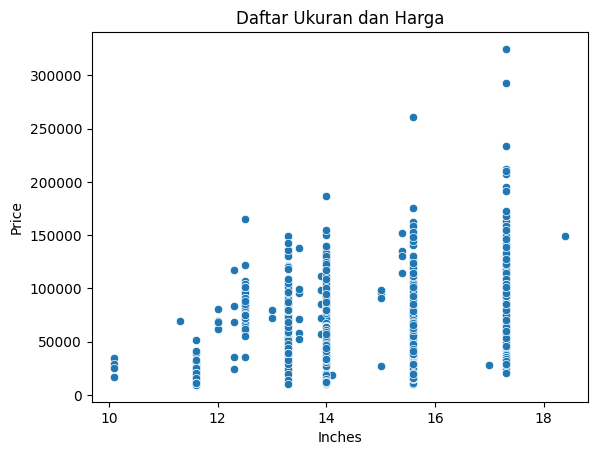

In [67]:
# Membuat scatter plot
sns.scatterplot(data = df, x = "Inches", y = "Price")

# Memberikan judul dan label
plt.title("Daftar Ukuran dan Harga")
plt.xlabel("Inches")
plt.ylabel("Price")

# Menampilkan plot
plt.show()

In [63]:
# Kolom label y adalah 'price'
y = df['Price']

# Kolom fitur x adalah 'Company'
x = df['Inches']

In [64]:
x = np.array(x).reshape(-1, 1) # Mengubah x menjadi matriks 2D dengan satu kolom
y = np.array(y) # Membuat y dari data label (target)

Degree 1: MSE = 1379545620.49
Degree 2: MSE = 1340224296.73
Degree 3: MSE = 1176347356.39
Degree 4: MSE = 1161595665.53
Degree 5: MSE = 1149940654.76
Degree 6: MSE = 1142111607.25
Degree 7: MSE = 1130101514.28
Degree 8: MSE = 1128663984.12
Degree 9: MSE = 1127211875.20
Degree 10: MSE = 1125880392.94
Degree 11: MSE = 1124912747.53
Degree 12: MSE = 1124604971.03


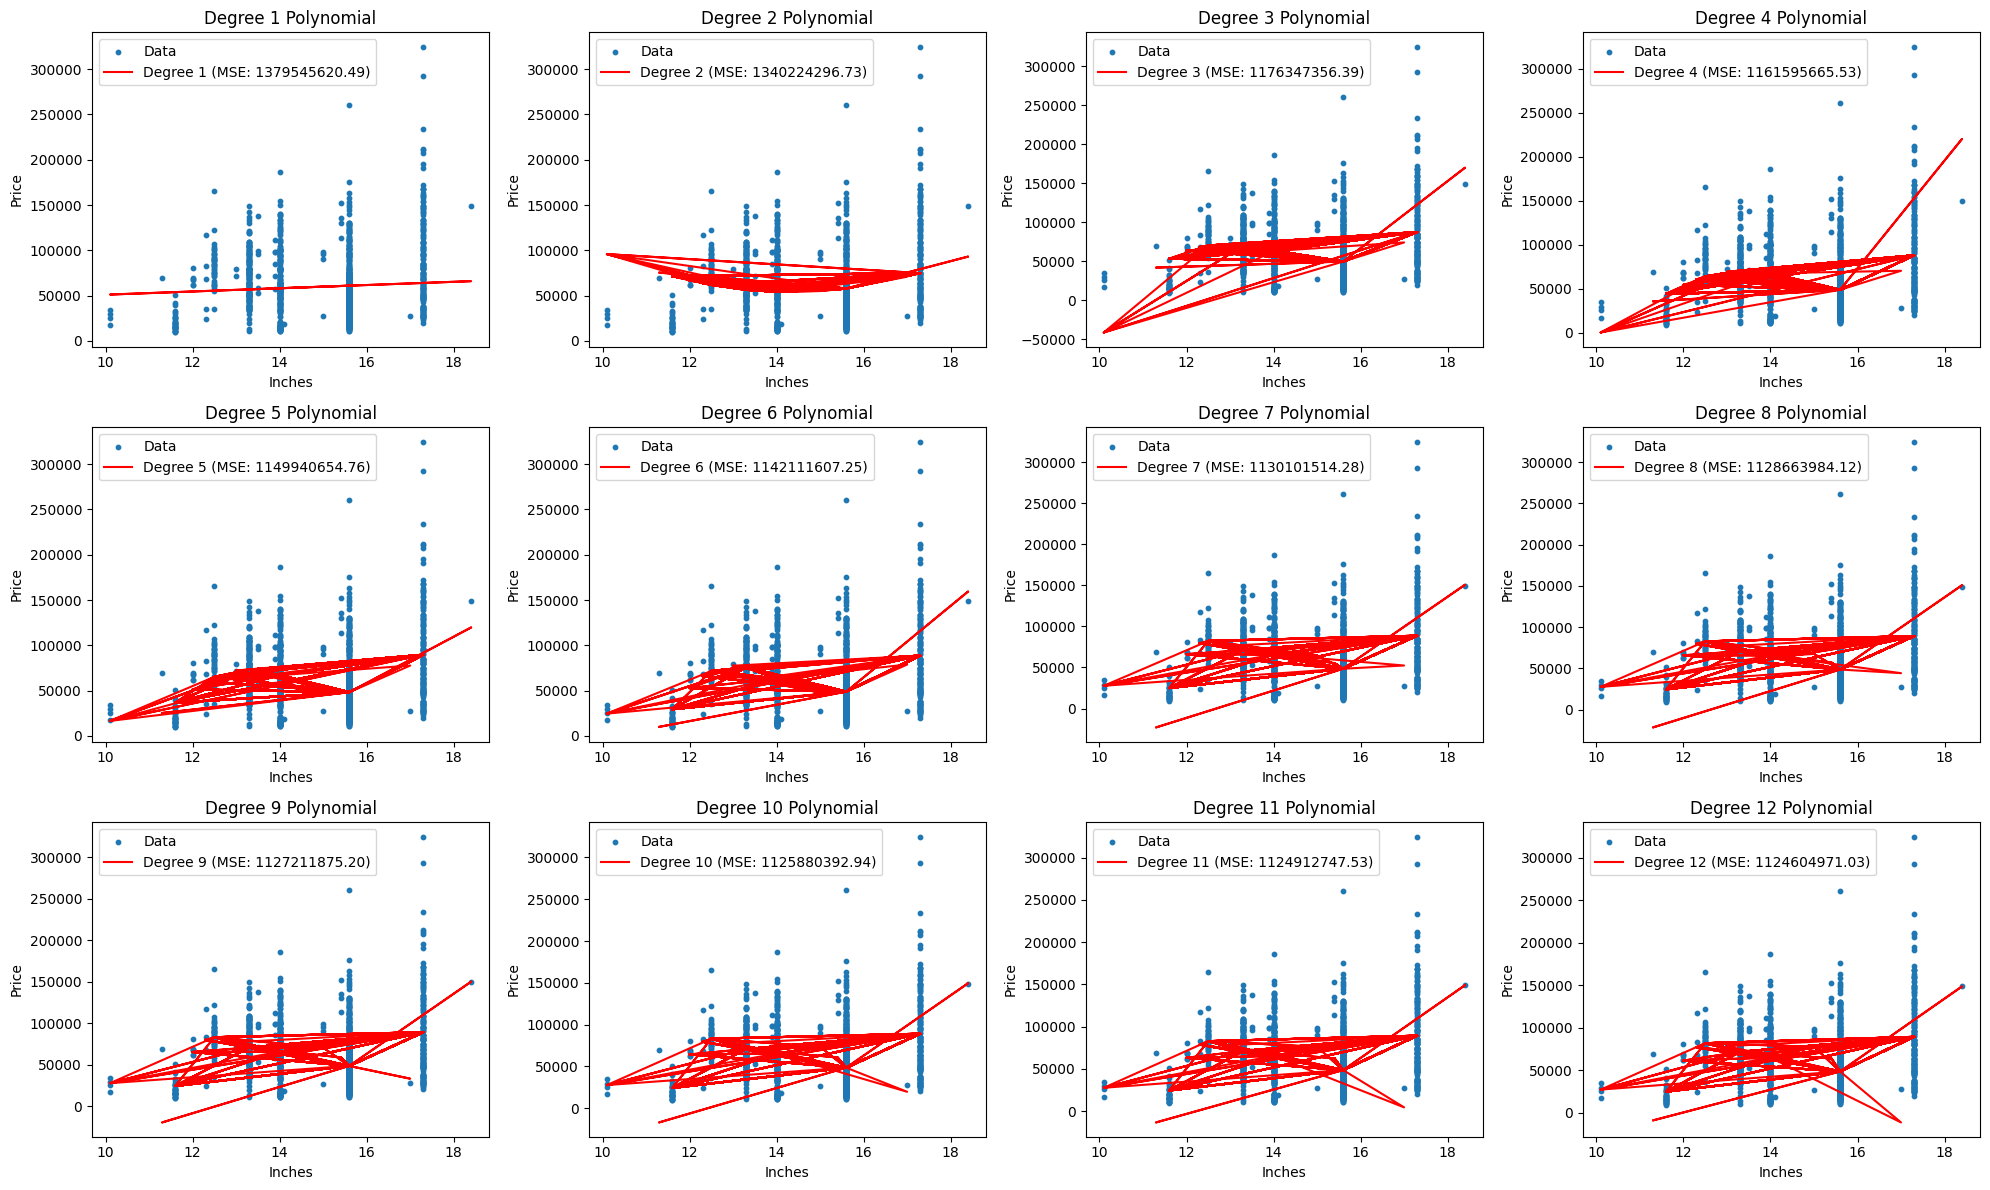

In [66]:
degrees = list(range(1, 13)) # Membuat daftar derajat polinomial yang akan diuji dari 1 hingga 12
mse_values = [] # Membuat list untuk menyimpan nilai MSE
plt.figure(figsize=(20, 12)) # Membuat plot terpisah untuk masing-masing derajat polinomial

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree) # Membuat objek PolynomialFeatures
    x_poly = polynomial_features.fit_transform(x) # Transformasi data menjadi polinomial
    model = LinearRegression() # Membuat model regresi linier dengan data polinomial
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly) # Prediksi dengan model yang telah dibuat
    mse = mean_squared_error(y, y_pred) # Menghitung Mean Squared Error (MSE)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    plt.subplot(3, 4, i + 1)
    plt.scatter(x, y, s=10, label='Data')
    plt.plot(x, y_pred, color='r', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('Inches')
    plt.ylabel('Price')
    plt.legend()

# Mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')

plt.tight_layout()
plt.show()
